## Analysis of the effects of bias on cosine similarity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from math import pi, sin, cos

In [2]:
def polar_to_cartesian_2d(rho, theta):
    return rho * np.array([cos(theta), sin(theta)])

In [3]:
def cos_sim_v(v1, v2):
    return v1.dot(v2) / (np.linalg.norm(v1,ord=2) * np.linalg.norm(v2,ord=2))

#### (Test the functions)

In [211]:
th1 = 0 # [0,pi/2]
th2 = pi/2 # [0,pi/2]
v1 = polar_to_cartesian_2d(1, th1)
v2 = polar_to_cartesian_2d(1, th2)
bias = 0.1 # [0,1]

In [212]:
delta_th = abs(th1-th2)
s = cos(delta_th)
s

6.123233995736766e-17

In [213]:
cos_sim_v(v1,v2)

6.123233995736766e-17

In [214]:
cos_sim_v(v1 + bias, v2 + bias)

0.18032786885245908

### Sensitivity of cosine similarity to delta increments for normalized 2D vectors

Notice that considering only normalized vectors, I can just consider their theta component (angle from the x axis). 

NB: I'm assuming vectors with only positive values.

In [215]:
# Compute similarity for all possible combinations of normalized vectors and all possible biases (in specified intervals)

n_cases_th = 20
n_cases_bias = 11
th1_arr = np.linspace(0, pi/2, n_cases_th)
th2_arr = np.linspace(0, pi/2, n_cases_th)
bias_arr = np.linspace(0, 1, n_cases_bias)

th1_mesh, th2_mesh = np.meshgrid(th1_arr, th2_arr)

s = {} 

for bias in bias_arr:
    s[bias] = np.empty_like(th1_mesh)
    for (i,j), _ in np.ndenumerate(th1_mesh):
        v1 = polar_to_cartesian_2d(1, th1_mesh[i,j])
        v2 = polar_to_cartesian_2d(1, th2_mesh[i,j])
        s[bias][i,j] = cos_sim_v(v1+bias, v2+bias)

In [216]:
th1_arr.shape

(20,)

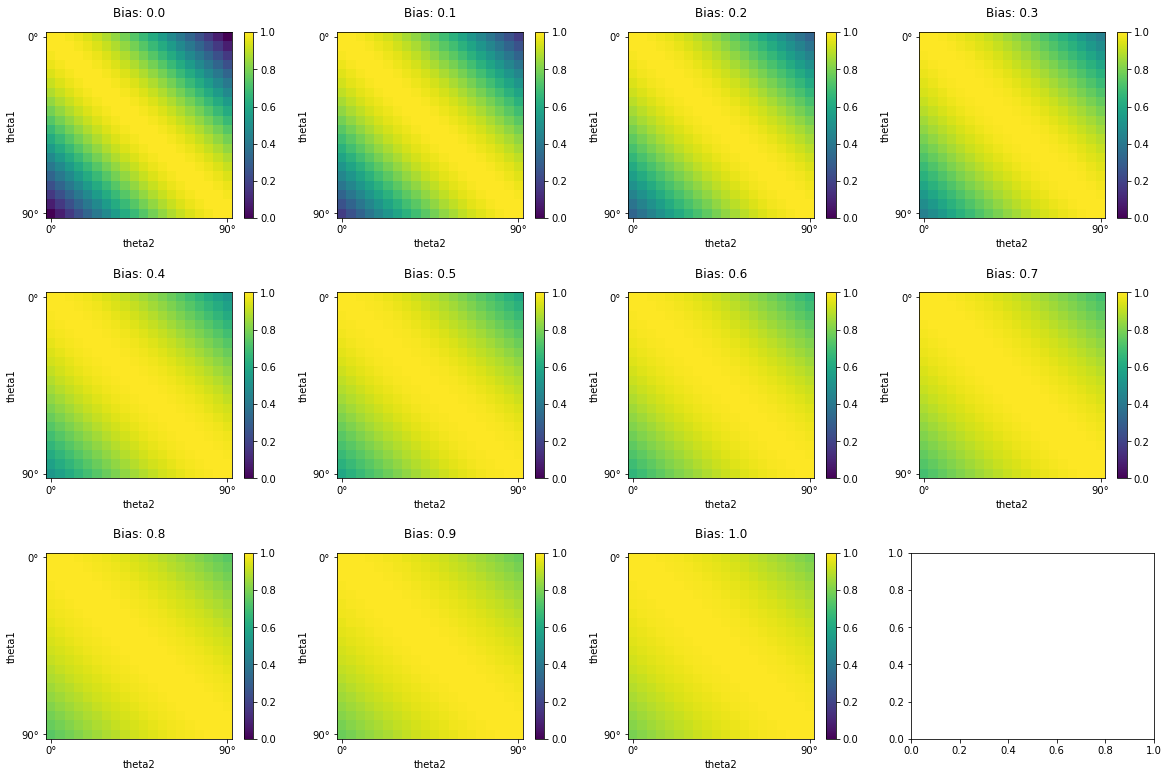

In [230]:
# Plot results

n_plots = len(bias_arr)
n_plot_cols = 4 # fixed for space reasons
n_plot_rows = round(float(n_plots) / n_plot_cols)

fig, axs = plt.subplots(n_plot_rows,n_plot_cols, figsize=(20, 4*n_plot_rows+1), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4)#, wspace=.01)
axs = axs.ravel()

#f = plt.figure()
for i, bias in np.ndenumerate(bias_arr):
    idx = i[0]
    #ax = f.add_subplot(n_plot_rows, n_plot_cols, idx+1)
    h = axs[idx].matshow(s[bias])
    fig.colorbar(h, ax=axs[idx])
    h.set_clim(0,1)
    axs[idx].set_title("Bias: {:.1f}".format(bias))
    axs[idx].set_ylabel('theta1')
    axs[idx].set_xlabel('theta2')
    axs[idx].set_xticks([0, s[bias].shape[1]-1])
    axs[idx].set_xticklabels(["0°", "90°"])
    axs[idx].xaxis.tick_bottom()
    axs[idx].set_yticks([0, s[bias].shape[0]-1])
    axs[idx].set_yticklabels(["0°", "90°"])
    axs[idx].yaxis.tick_left()

plt.show()

In [231]:
# fig.savefig('Figures/numerical_analysis_bias_effect')

In [233]:
print("With max bias (1.0), min similarity value (orthogonal vectors) is {}".format(np.min(s[1.0])))
print("\nIndeed:")
for bias in bias_arr:
    print("Bias {:.1f} - Similarity is withing [{:.3f} , {:.3f}]".format(bias, np.min(s[bias]), np.max(s[bias])))

With max bias (1.0), min similarity value (orthogonal vectors) is 0.7999999999999998

Indeed:
Bias 0.0 - Similarity is withing [0.000 , 1.000]
Bias 0.1 - Similarity is withing [0.180 , 1.000]
Bias 0.2 - Similarity is withing [0.324 , 1.000]
Bias 0.3 - Similarity is withing [0.438 , 1.000]
Bias 0.4 - Similarity is withing [0.528 , 1.000]
Bias 0.5 - Similarity is withing [0.600 , 1.000]
Bias 0.6 - Similarity is withing [0.658 , 1.000]
Bias 0.7 - Similarity is withing [0.704 , 1.000]
Bias 0.8 - Similarity is withing [0.742 , 1.000]
Bias 0.9 - Similarity is withing [0.774 , 1.000]
Bias 1.0 - Similarity is withing [0.800 , 1.000]


Obs: I can see how bias moves vectors close together, shrinking the cosine values from $ [0,1] $ to $[0.8,1]$.

### Sensitivity of cosine similarity to delta increments for non-normalized 2D vectors

What really metters as a difference from previous case is the ratio between the vector modules and the bias.
I can thus fix one vector to remain normalized (v1), and change the bias and the rho of the other vector (v2).

NB: I'm assuming vectors with only positive values.

Notice that while theta represents the 'direction' of the feature, on which I measure the similarity, rho can be interpreted as the weight given to such feature overall.

In [12]:
# Compute similarity for all possible combinations of normalized vectors and all possible biases (in specified intervals)

n_cases_th = 20
n_cases_rho = 5
n_cases_bias = 5
max_rho = 10
max_bias = max_rho
th1_arr = np.linspace(0, pi/2, n_cases_th) # v2 normalized
th2_arr = np.linspace(0, pi/2, n_cases_th)
rho2_arr = np.linspace(1, max_rho, n_cases_rho)
bias_arr = np.linspace(0, max_bias, n_cases_bias)

rho2_mesh, th1_mesh, th2_mesh = np.meshgrid(rho2_arr, th1_arr, th2_arr, indexing='ij')

s = {} 

for bias in bias_arr:
    s[bias] = {}
    for (i_rho2), rho2 in np.ndenumerate(rho2_arr):
        s[bias][rho2] = np.empty_like(th1_mesh[i_rho2])
        for (i,j), _ in np.ndenumerate(th1_mesh[i_rho2]):
            v1 = polar_to_cartesian_2d(1, th1_mesh[i_rho2, i,j])
            v2 = polar_to_cartesian_2d(rho2_mesh[i_rho2,i,j], th2_mesh[i_rho2, i,j])
            s[bias][rho2][i,j] = cos_sim_v(v1+bias, v2+bias)

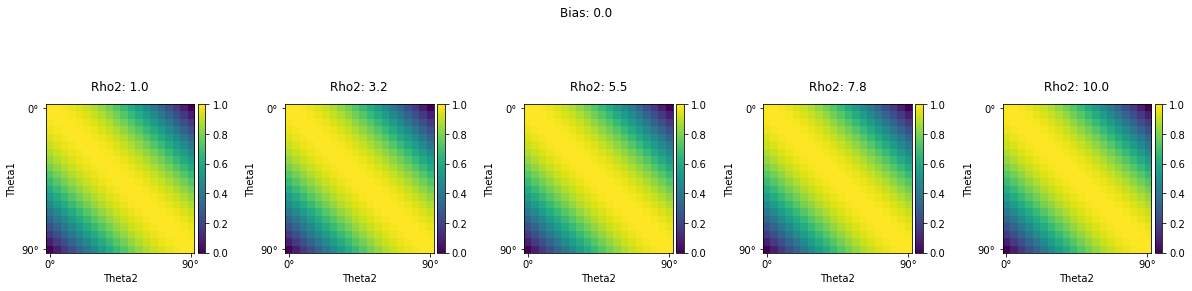

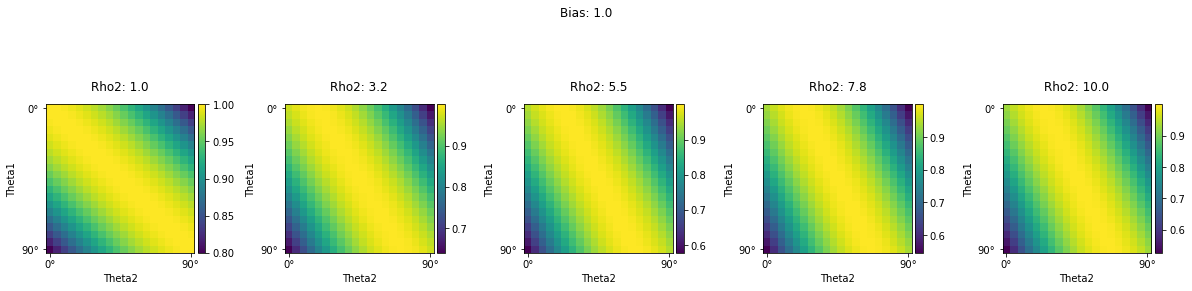

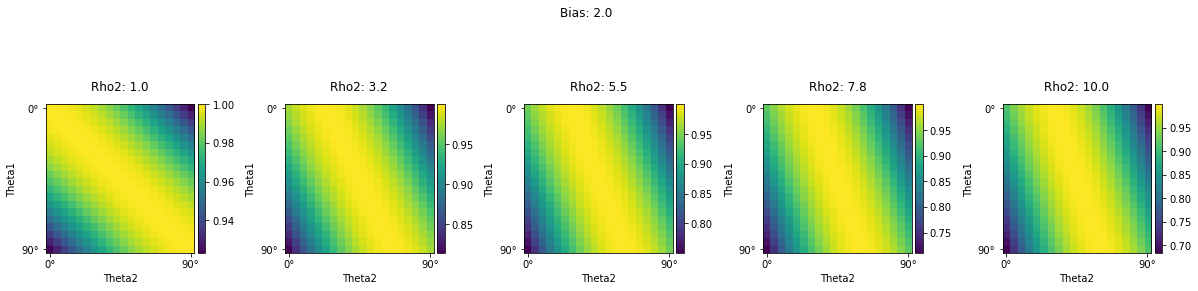

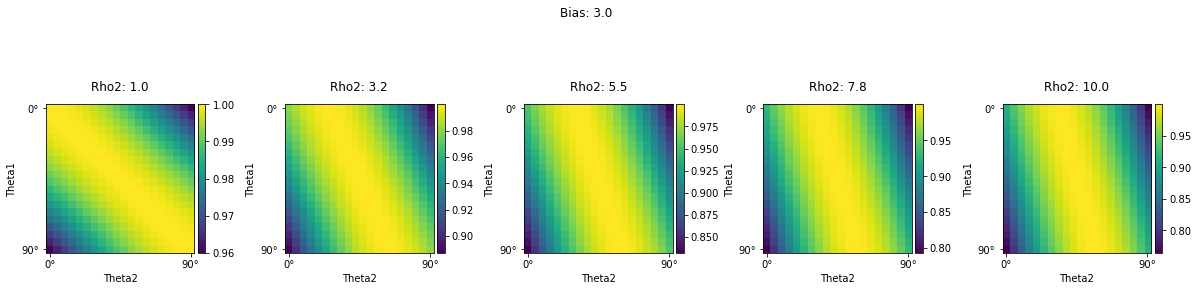

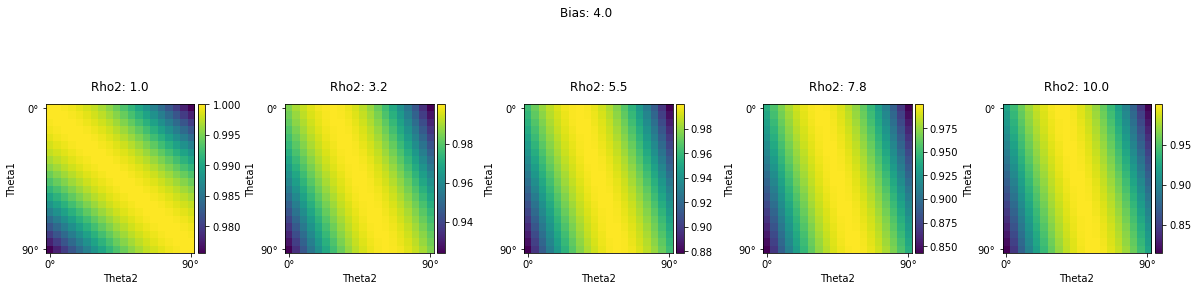

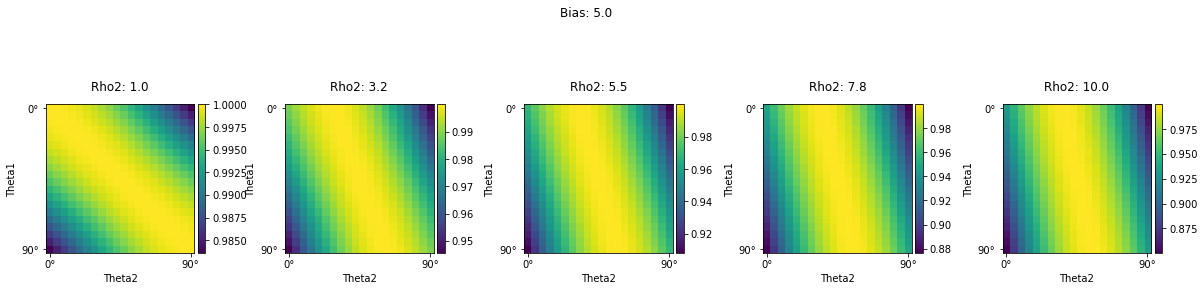

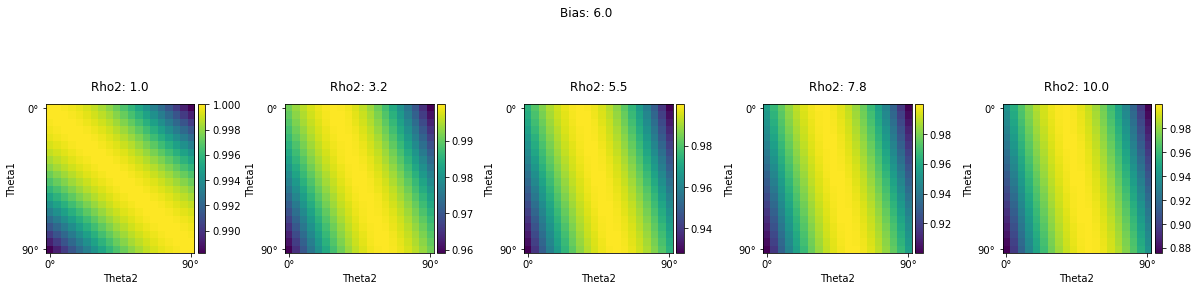

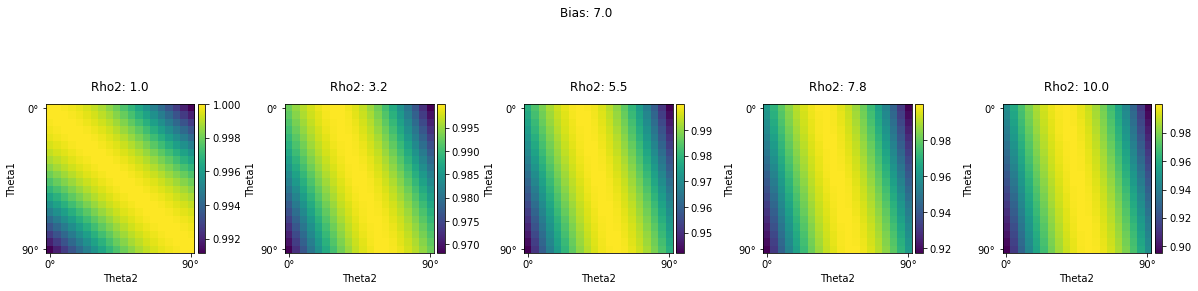

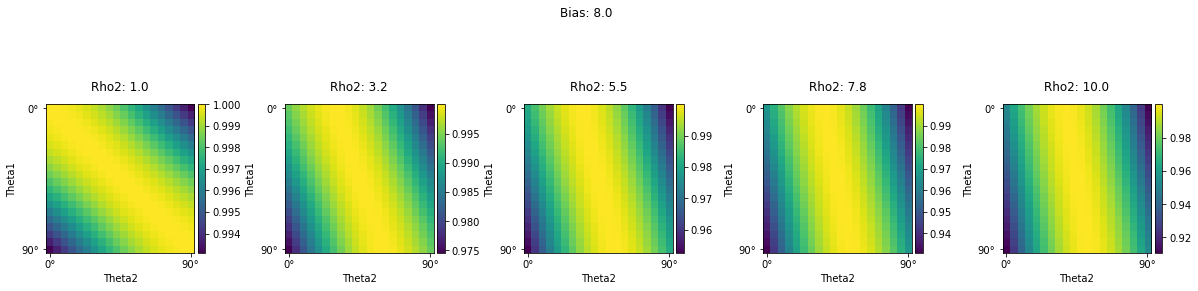

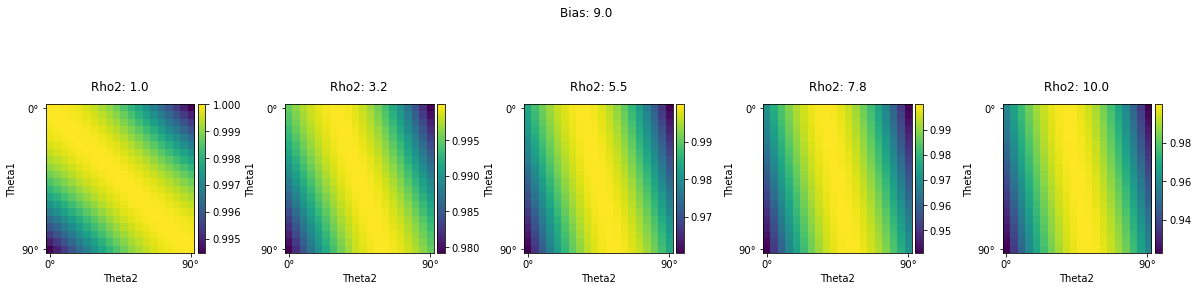

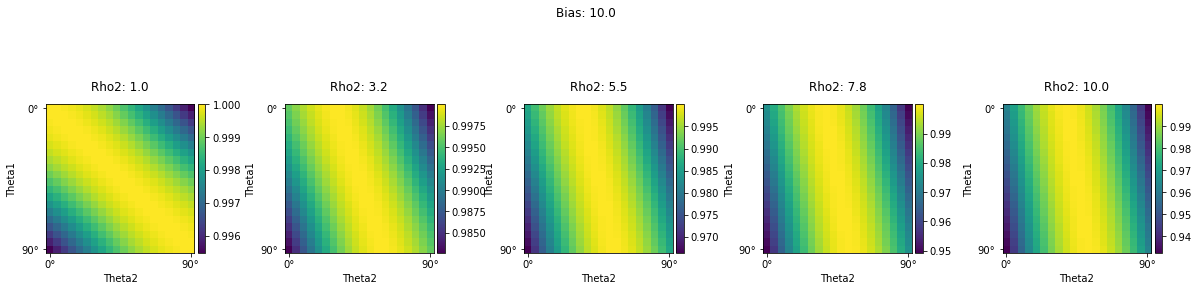

In [5]:
# Plot results

for bias in bias_arr:

    n_plots = len(rho2_arr)
    n_plot_cols = 5 # fixed for space reasons
    n_plot_rows = round(float(n_plots) / n_plot_cols)

    fig, axs = plt.subplots(n_plot_rows,n_plot_cols, figsize=(20, 4*n_plot_rows+1), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .1, wspace=.5)
    #fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    axs = axs.ravel()

    #f = plt.figure()
    for i, rho in np.ndenumerate(rho2_arr):
        idx = i[0]
        #ax = f.add_subplot(n_plot_rows, n_plot_cols, idx+1)
        h = axs[idx].matshow(s[bias][rho])
        
        # colorbar of same height of plot
        divider = make_axes_locatable(axs[idx])
        colorbar_ax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(h, cax=colorbar_ax)
        #fig.colorbar(h, ax=axs[idx])
    
        # h.set_clim(0,1) # not used here, because scale changes too much from one to the other
        axs[idx].set_title("Rho2: {:.1f}".format(rho))
        #axs[idx].set_title("Bias: {:.1f} - Rho2: {:.1f}".format(bias,rho))
        axs[idx].set_ylabel('Theta1')
        axs[idx].set_xlabel('Theta2')
        axs[idx].set_xticks([0, s[bias][rho].shape[1]-1])
        axs[idx].set_xticklabels(["0°", "90°"])
        axs[idx].xaxis.tick_bottom()
        axs[idx].set_yticks([0, s[bias][rho].shape[0]-1])
        axs[idx].set_yticklabels(["0°", "90°"])
        axs[idx].yaxis.tick_left()

    fig.suptitle("Bias: {:.1f}".format(bias))
    plt.show()

Notice I did not rescale the colormap because some plots would appear all yellow. Moreover, in this fashion I can see what's the min and max value for each plot looking at the legend.

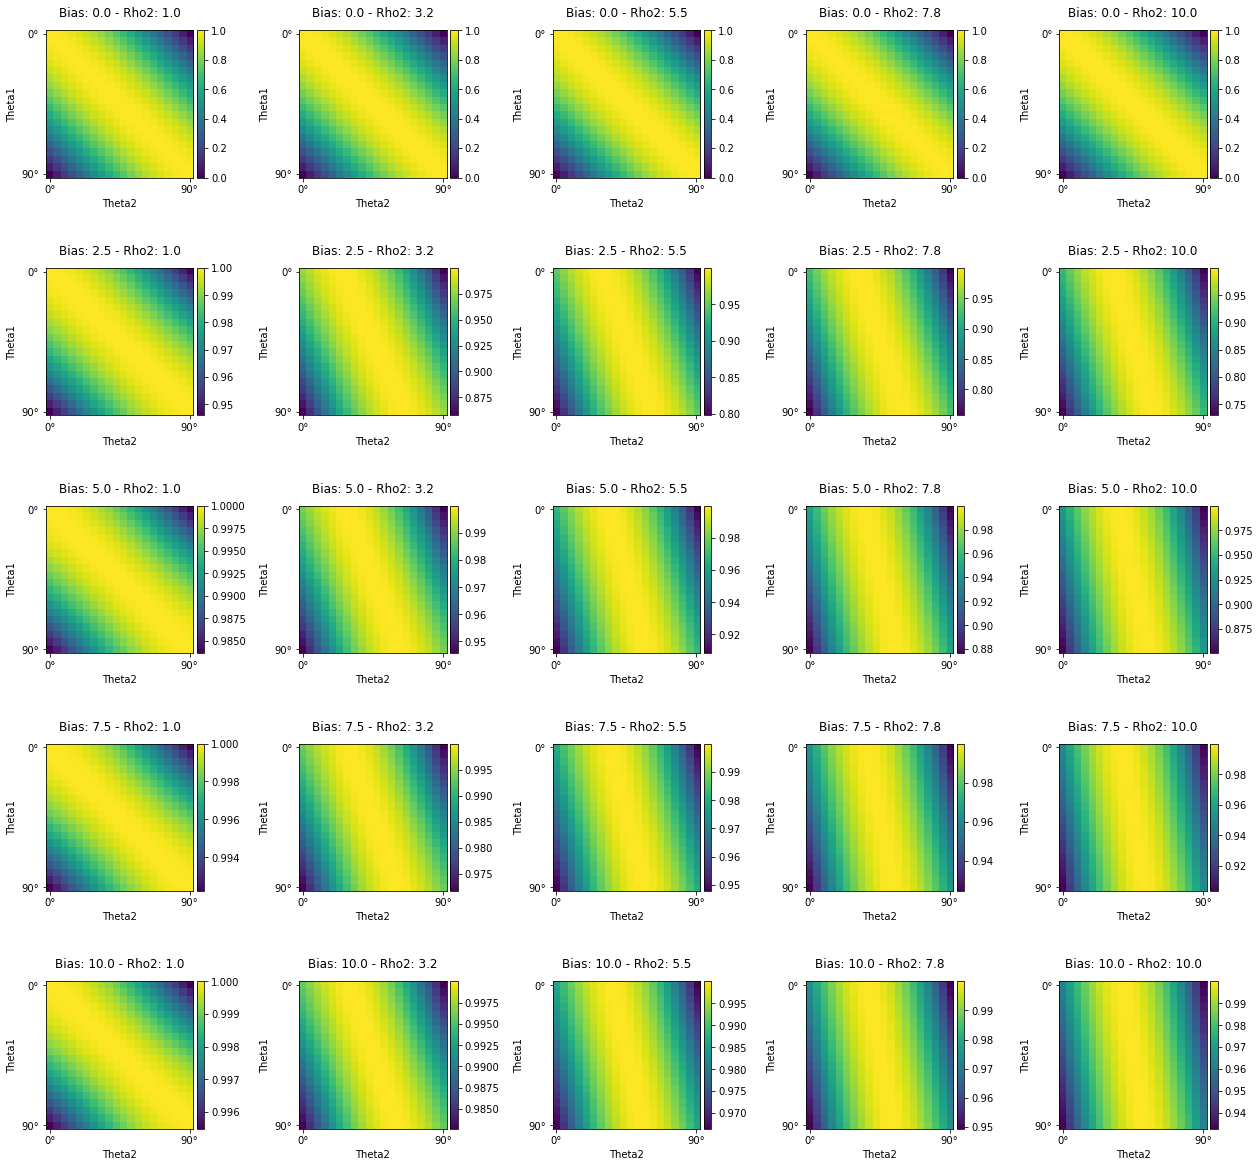

In [14]:
# Plot results as single figure

n_plot_rows = len(bias_arr)
n_plot_cols = len(rho2_arr)
n_plots = n_plot_rows * n_plot_cols

fig, axs = plt.subplots(n_plot_rows, n_plot_cols, figsize=(21, 4*n_plot_rows+1), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.6)
axs = axs.ravel()

for _i, bias in np.ndenumerate(bias_arr):
    i = _i[0]

    for _j, rho in np.ndenumerate(rho2_arr):
        j = _j[0]
        ax_idx = i * n_plot_cols + j
        
        #ax = f.add_subplot(n_plot_rows, n_plot_cols, idx+1)
        h = axs[ax_idx].matshow(s[bias][rho])
        
        # colorbar of same height of plot
        divider = make_axes_locatable(axs[ax_idx])
        colorbar_ax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(h, cax=colorbar_ax)
        #fig.colorbar(h, ax=axs[idx])
    
        # h.set_clim(0,1) # not used here, because scale changes too much from one to the other
        #axs[ax_idx].set_title("Rho2: {:.1f}".format(rho))
        axs[ax_idx].set_title("Bias: {:.1f} - Rho2: {:.1f}".format(bias,rho))
        axs[ax_idx].set_ylabel('Theta1')
        axs[ax_idx].set_xlabel('Theta2')
        axs[ax_idx].set_xticks([0, s[bias][rho].shape[1]-1])
        axs[ax_idx].set_xticklabels(["0°", "90°"])
        axs[ax_idx].xaxis.tick_bottom()
        axs[ax_idx].set_yticks([0, s[bias][rho].shape[0]-1])
        axs[ax_idx].set_yticklabels(["0°", "90°"])
        axs[ax_idx].yaxis.tick_left()


In [15]:
fig.savefig("Figures/numerical_analysis_bias_effect_general_short.png")

Both rho and bias skew the identity (same angle --> sim = 1). Notice how eventually the line sim=1 is vertical in this example, thus the similarity depends only on the value assumed by theta2, and theta1 has no influence at all!!!

At the same time, bias still shrinks the interval. However, increasing rho (and thus decreasing the ratio between bias and rho) the shrinkage is a little bit relaxed.

#### Numerical tests on behavior of cosine similarity for angles on same side of the bisectrix

In [27]:
# both before bisectrix, v1 on x axis, v1,v2 normalized
bias = 1

th1 = 0 * pi/180
for th2 in np.linspace(0,90,10)*pi/180:
    v1 = polar_to_cartesian_2d(1,th1)
    v2 = polar_to_cartesian_2d(1,th2)
    print("Theta2: {:.1f} \t Delta with and without delta: {}".format(th2*180/pi, cos_sim_v(v1+bias, v2+bias) - cos_sim_v(v1,v2)))

Theta2: 0.0 	 Delta with and without delta: -2.220446049250313e-16
Theta2: 10.0 	 Delta with and without delta: 0.012717864186732597
Theta2: 20.0 	 Delta with and without delta: 0.0502984353412782
Theta2: 30.0 	 Delta with and without delta: 0.11128367886195001
Theta2: 40.0 	 Delta with and without delta: 0.19344602744790007
Theta2: 50.0 	 Delta with and without delta: 0.2938494155461724
Theta2: 60.0 	 Delta with and without delta: 0.40893819620920935
Theta2: 70.0 	 Delta with and without delta: 0.5346507693607432
Theta2: 80.0 	 Delta with and without delta: 0.6665546760484171
Theta2: 90.0 	 Delta with and without delta: 0.7999999999999997


In [28]:
# both before bisectrix, v1 at 40°, v1,v2 normalized
bias = 1

th1 = 40 * pi/180
for th2 in np.linspace(0,90,10)*pi/180:
    v1 = polar_to_cartesian_2d(1,th1)
    v2 = polar_to_cartesian_2d(1,th2)
    print("Theta2: {:.1f} \t Delta with and without delta: {}".format(th2*180/pi, cos_sim_v(v1+bias, v2+bias) - cos_sim_v(v1,v2)))

Theta2: 0.0 	 Delta with and without delta: 0.19344602744790007
Theta2: 10.0 	 Delta with and without delta: 0.11089842624060287
Theta2: 20.0 	 Delta with and without delta: 0.04995651414779001
Theta2: 30.0 	 Delta with and without delta: 0.012588892031131116
Theta2: 40.0 	 Delta with and without delta: 0.0
Theta2: 50.0 	 Delta with and without delta: 0.012580847169583187
Theta2: 60.0 	 Delta with and without delta: 0.04989147267922811
Theta2: 70.0 	 Delta with and without delta: 0.1106749526323414
Theta2: 80.0 	 Delta with and without delta: 0.19290255103060205
Theta2: 90.0 	 Delta with and without delta: 0.2938494155461723


For both v1 on x axis and wherever below bisectrix, with v1,v2 normalized, if I move v2 apart from it, the increment given by the bias is always positive and increasing.

In [29]:
# both before bisectrix, v1 on x axis, v1,v2 not normalized, bias same scale of both rho
bias = 5

rho1 = 1
rho2 = 10
th1 = 40 * pi/180
for th2 in np.linspace(0,90,10)*pi/180:
    v1 = polar_to_cartesian_2d(rho1,th1)
    v2 = polar_to_cartesian_2d(rho2,th2)
    print("Theta2: {:.1f} \t Delta with and without delta: {}".format(th2*180/pi, cos_sim_v(v1+bias, v2+bias) - cos_sim_v(v1,v2)))

Theta2: 0.0 	 Delta with and without delta: 0.13316180393532606
Theta2: 10.0 	 Delta with and without delta: 0.07380135411306288
Theta2: 20.0 	 Delta with and without delta: 0.03035212103045115
Theta2: 30.0 	 Delta with and without delta: 0.005030621259408341
Theta2: 40.0 	 Delta with and without delta: -0.0008127778504156691
Theta2: 50.0 	 Delta with and without delta: 0.013275362156022652
Theta2: 60.0 	 Delta with and without delta: 0.04684258532297214
Theta2: 70.0 	 Delta with and without delta: 0.09854455907971016
Theta2: 80.0 	 Delta with and without delta: 0.1661816594310147
Theta2: 90.0 	 Delta with and without delta: 0.2467561382109893


In [37]:
# both before bisectrix, v1 at some degrees, v1,v2 not normalized, bias not same scale of both rho
bias = 5

rho1 = 1
rho2 = 10
th1 = 20 * pi/180
for th2 in np.linspace(0,90,10)*pi/180:
    v1 = polar_to_cartesian_2d(rho1,th1)
    v2 = polar_to_cartesian_2d(rho2,th2)
    print("Theta2: {:.1f} \t Delta with and without delta: {}".format(th2*180/pi, cos_sim_v(v1+bias, v2+bias) - cos_sim_v(v1,v2)))

Theta2: 0.0 	 Delta with and without delta: -0.022859027377129415
Theta2: 10.0 	 Delta with and without delta: -0.03142710905593005
Theta2: 20.0 	 Delta with and without delta: -0.02058568384915682
Theta2: 30.0 	 Delta with and without delta: 0.010140728557758494
Theta2: 40.0 	 Delta with and without delta: 0.06030575290508622
Theta2: 50.0 	 Delta with and without delta: 0.1285660951063028
Theta2: 60.0 	 Delta with and without delta: 0.2127282357419117
Theta2: 70.0 	 Delta with and without delta: 0.3098164019797113
Theta2: 80.0 	 Delta with and without delta: 0.4161598016304199
Theta2: 90.0 	 Delta with and without delta: 0.527495641138393


Can happen, although rarely, that adding delta moves the vectors a little bit apart. Couldn't find any config where the difference is large comparably to other cases, but still it can be negative.
Obs: vectors move apart $\implies$ similarity decreases